<a href="https://colab.research.google.com/github/Zahid8/Sparks-Foundation-internship-task/blob/main/Prediction_using_Supervised_ML_TSF_GRIP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression with Python Tensorflow and keras**
In this section we will see how the Python Tensorflow library for machine learning can be used to implement the given task 1.
### **Task details**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

###  Importing the required libraries


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import tensorflow as tf
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_marks = pd.read_csv(url)
print("Data imported successfully")

student_marks.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Train and Test splitting the data

In [3]:
X = student_marks.iloc[:, :-1].values  
y = student_marks.iloc[:, 1].values  

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [5]:
print(f"shape of X_train: {X_train.shape} \n shape of y_train: {y_train.shape} \n shape of X_test: {X_test.shape} \n shape of y_test: {y_test.shape}")

shape of X_train: (20, 1) 
 shape of y_train: (20,) 
 shape of X_test: (5, 1) 
 shape of y_test: (5,)


### Train Data **Visualization**

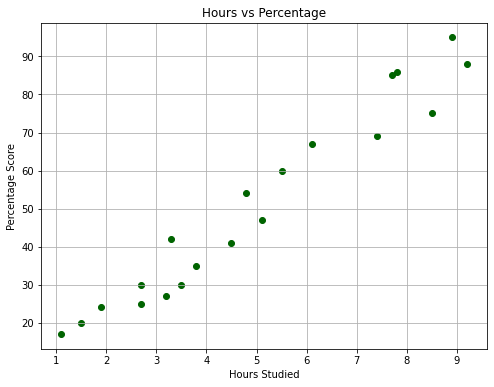

In [6]:
# Plotting the distribution of scores
plt.figure(figsize=(8,6)) 
plt.scatter(X_train,y_train,color = '#006400')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

### Converting the data to numpy arrays

In [7]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train)
print(X_train.shape,y_train.shape)

(20, 1) (20,)


### Creating a Sequential Model with Tensorflow 2

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
        Dense(1)
])

###### Using hidden layers=1, so that the model does not overfit.

### Compiling the Sequential model using appropriate optimizer

In [9]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse
model.compile(optimizer=SGD(learning_rate=0.0001),loss=mse)

### Fitting the Sequential model

In [10]:
history = model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 579ms/step - loss: 4182.8760
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 4130.4653
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 4078.7168
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 4027.6218
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 3977.1719
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 3927.3589
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 3878.1750
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 3829.6118
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 3781.6616
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 3734.3171
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 3687.5698
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 3641.4133
Epoch 13/10

###### The loss is reduced over time and the line of fit of the model seems to be the best fit for the below data

### Model Performance Analysis

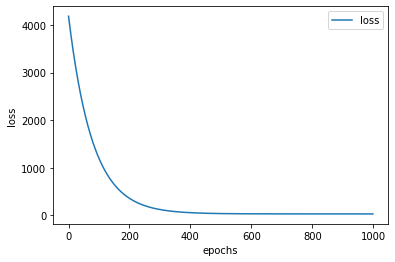

In [11]:
#loss over time
plt.plot(history.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Testing the Model on the Test Set

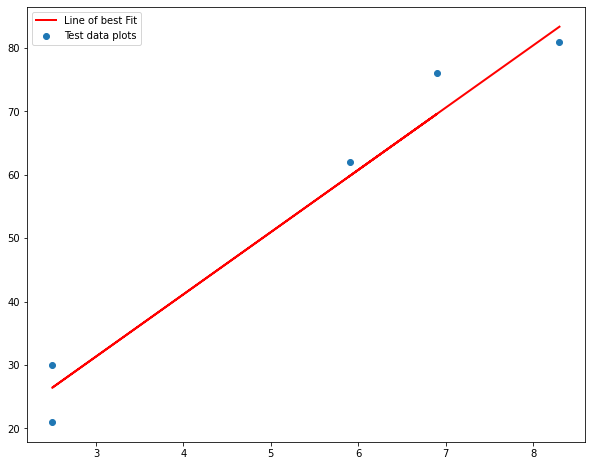

In [12]:
#testing the model
y_pred = model.predict(np.array(X_test).reshape(-1,1))
plt.figure(figsize=(10,8))
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Line of best Fit')
plt.scatter(X_test,y_test,label='Test data plots')
plt.legend()

###### The parameters of the line of best fit would be in such a way that the difference between the points in the line and the sum of data points that are vertically away from it is minimum. 

### Making Predictions

In [13]:
print(X_test) # Testing data - In Hours
y_preds = model.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds.squeeze()})  
df 

,Actual,Predicted
0,81,83.350372
1,30,26.408014
2,21,26.408014
3,76,69.605659
4,62,59.788013


### Plotting predictions along with train and test data

In [15]:
#custom function for plotting
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

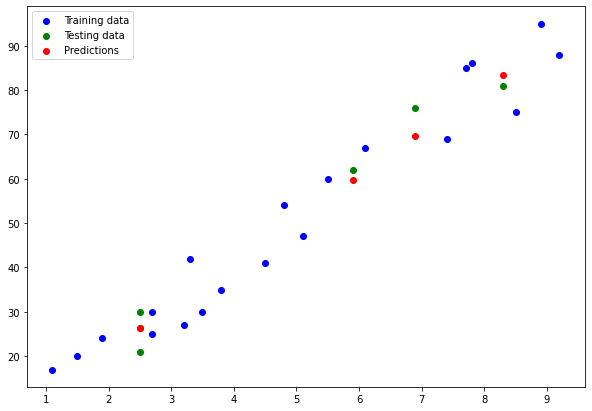

In [16]:
# Make and plot predictions for model
y_preds = model.predict(X_test)
plot_predictions(predictions=y_preds)

### Predicted score if a student studies for 9.25 hrs/day

In [17]:
hours_studied = 9.25
y_pred = model.predict([hours_studied])
print("No of Hours = {}".format(hours_studied))
print("Predicted Score = {}".format(y_pred[0]))

No of Hours = 9.25
Predicted Score = [92.67713]


### Evaluating the model using Mean Absolute error and Mean Squared Error

In [18]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [19]:
# Calculate model_1 metrics
mae_study = mae(y_test, y_preds.squeeze()).numpy()
mse_study = mse(y_test, y_preds.squeeze()).numpy()
print(f"Mean Absolute error: {mae_study} \n Mean Squared Error: {mse_study}")

Mean Absolute error: 3.991339921951294 
 Mean Squared Error: 18.69074058532715
